<h1>Persiapan Dataset</h1>


In [ ]:
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"putradwiwiragardha","key":"8c7fa31bb4b542e5a3b9e248a42b785a"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d sriramr/fruits-fresh-and-rotten-for-classification

100% 3.58G/3.58G [03:10<00:00, 22.1MB/s]
100% 3.58G/3.58G [03:10<00:00, 20.2MB/s]


<h1>Ekstrak File Dataset</h1>

In [ ]:
import zipfile,os

In [ ]:
local_zip = '/content/fruits-fresh-and-rotten-for-classification.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

In [ ]:
base_dir = '/tmp/dataset/dataset'

In [ ]:
test_dir = '/tmp/dataset/dataset/test'
train_dir = '/tmp/dataset/dataset/train'

<h1>Melihat File Dataset</h1>

In [ ]:
total_test = 0

for i in os.listdir(test_dir):
  total_test += len(os.listdir(test_dir+'/'+i))
  print('Total File ', i, ' = ', len(os.listdir(test_dir+'/'+i)))

print(total_test)

Total File  freshoranges  =  388
Total File  rottenapples  =  601
Total File  rottenbanana  =  530
Total File  freshapples  =  395
Total File  rottenoranges  =  403
Total File  freshbanana  =  381
2698


In [ ]:
total_train = 0

for i in os.listdir(train_dir):
  total_train += len(os.listdir(train_dir+'/'+i))
  print('Total File ', i, ' = ', len(os.listdir(train_dir+'/'+i)))

print(total_train)

Total File  freshoranges  =  1466
Total File  rottenapples  =  2342
Total File  rottenbanana  =  2224
Total File  freshapples  =  1693
Total File  rottenoranges  =  1595
Total File  freshbanana  =  1581
10901


In [ ]:
total = 0
total = total_test + total_train

print('Total Dataset = ', total)

Total Dataset =  13599


In [ ]:
os.listdir(test_dir)

['freshoranges',
 'rottenapples',
 'rottenbanana',
 'freshapples',
 'rottenoranges',
 'freshbanana']

In [ ]:
os.listdir(train_dir)

['freshoranges',
 'rottenapples',
 'rottenbanana',
 'freshapples',
 'rottenoranges',
 'freshbanana']

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

In [ ]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + target_class
  random_image = random.sample(os.listdir(target_folder), 1)

  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Ukuran Gambar :{img.shape}")
  return img

Ukuran Gambar :(338, 370, 3)


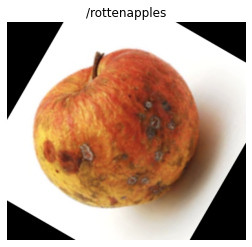

In [ ]:
img = view_random_image(train_dir, '/rottenapples')

In [ ]:
img

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [ ]:
def plot_loss_curves(history):
 loss = history.history['loss'] 
 val_loss = history.history['val_loss']

 accuracy = history.history['accuracy'] 
 val_accuracy = history.history['val_accuracy']

 epochs = range(len(history.history['loss']))

 plt.plot(epochs, loss, label='training_loss') 
 plt.plot(epochs, val_loss, label='val_loss')
 plt.title("Loss")
 plt.xlabel("epochs")
 plt.legend()

 plt.figure()

 plt.plot(epochs, accuracy, label='training_accuracy') 
 plt.plot(epochs, val_accuracy, label='val_accuracy')
 plt.title("accuracy")
 plt.xlabel("epochs")
 plt.legend() 

<h1>Pembuatan Model</h1>

In [ ]:
import tensorflow as tf

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation
from tensorflow.keras import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255
)
val_datagen = ImageDataGenerator(
    rescale=1./255
)

In [ ]:
train_data_rf = train_datagen.flow_from_directory(
    train_dir,
    batch_size = 15,
    target_size = (200,200),
    class_mode = "categorical"
)
val_data_rf = val_datagen.flow_from_directory(
    test_dir,
    batch_size = 15,
    target_size = (200,200),
    class_mode = "categorical"
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(6, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 198, 198, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 99, 99, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 97, 97, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 48, 48, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 46, 46, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 44, 44, 64)        3

In [ ]:
model.compile(
    loss='categorical_crossentropy',
    optimizer='adamax',
    metrics=['accuracy']
)

In [ ]:
hist = model.fit(
    train_data_rf,
    epochs=15,
    validation_data=val_data_rf
)

Epoch 1/15
727/727 [==============================] - 80s 100ms/step - loss: 0.6076 - accuracy: 0.7837 - val_loss: 0.4096 - val_accuracy: 0.8558
Epoch 2/15
727/727 [==============================] - 68s 94ms/step - loss: 0.2926 - accuracy: 0.8973 - val_loss: 0.2557 - val_accuracy: 0.9103
Epoch 3/15
727/727 [==============================] - 67s 92ms/step - loss: 0.2136 - accuracy: 0.9249 - val_loss: 0.2424 - val_accuracy: 0.8981
Epoch 4/15
727/727 [==============================] - 71s 98ms/step - loss: 0.1602 - accuracy: 0.9405 - val_loss: 0.1951 - val_accuracy: 0.9292
Epoch 5/15
727/727 [==============================] - 67s 92ms/step - loss: 0.1243 - accuracy: 0.9564 - val_loss: 0.1500 - val_accuracy: 0.9437
Epoch 6/15
727/727 [==============================] - 69s 95ms/step - loss: 0.0989 - accuracy: 0.9652 - val_loss: 0.2001 - val_accuracy: 0.9288
Epoch 7/15
727/727 [==============================] - 74s 102ms/step - loss: 0.0892 - accuracy: 0.9684 - val_loss: 0.1316 - val_accurac

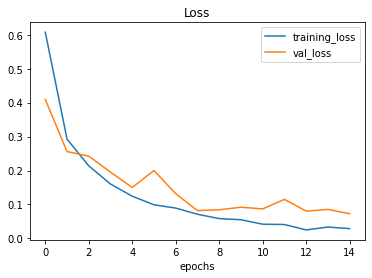

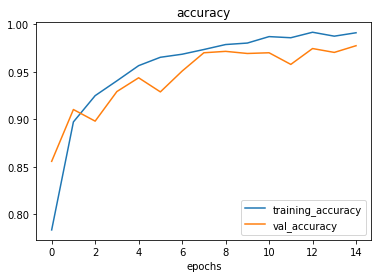

In [ ]:
plot_loss_curves(hist)

Saving fapel.jpg to fapel (1).jpg
1/1 [==============================] - 0s 20ms/step
fapel.jpg is a Fresh Apples


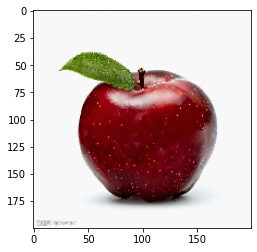

In [ ]:
import numpy as np

# predict image
%matplotlib inline
uploaded = files.upload()

for fn in uploaded.keys():
  path = fn
  img = tf.keras.utils.load_img(path, target_size=(200, 200))
  imgplot = plt.imshow(img)
  x = tf.keras.utils.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  arr = model.predict(images, batch_size=10)
  if arr[0][0]==1:
    labels='Fresh Apples'
  elif arr[0][1]==1:
    labels='Fresh Banana'
  elif arr[0][2]==1:
    labels='Fresh Oranges'
  elif arr[0][3]==1:
    labels='Rotten Apples'
  elif arr[0][4]==1:
    labels='Rotten Banana'
  elif arr[0][5]==1:
    labels='Rotten Oranges'
print('{} is a {}'.format(fn,labels))

In [ ]:
model.save("model.h5")